# Analyzing exam scores

Now let's now move on to the competition and challenge.

## 📖 Background
Your best friend is an administrator at a large school. The school makes every student take year-end math, reading, and writing exams.

Since you have recently learned data manipulation and visualization, you suggest helping your friend analyze the score results. The school's principal wants to know if test preparation courses are helpful. She also wants to explore the effect of parental education level on test scores. 

## 💾 The data

#### The file has the following fields ([source](http://roycekimmons.com/tools/generated_data/exams)):
- "gender" - male / female
- "race/ethnicity" - one of 5 combinations of race/ethnicity
- "parent_education_level" -  highest education level of either parent
- "lunch" - whether the student receives free/reduced or standard lunch
- "test_prep_course" - whether the student took the test preparation course
- "math" -  exam score in math 
- "reading" -  exam score in reading 
- "writing" -  exam score in writing 

## 💪 Challenge
Create a report to answer the principal's questions. Include:

1. What are the average reading scores for students with/without the test preparation course?
2. What are the average scores for the different parental education levels?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).
5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores. 
6. Summarize your findings.

In [7]:
# Importing the module
import pandas as pd
import seaborn as sns
import numpy as np

# Reading in the data
df = pd.read_csv('data/exams.csv')

# the first datapoints
print(df.head())

   gender race/ethnicity parent_education_level         lunch  \
0  female        group B      bachelor's degree      standard   
1  female        group C           some college      standard   
2  female        group B        master's degree      standard   
3    male        group A     associate's degree  free/reduced   
4    male        group C           some college      standard   

  test_prep_course  math  reading  writing  
0             none    72       72       74  
1        completed    69       90       88  
2             none    90       95       93  
3             none    47       57       44  
4             none    76       78       75  


## run a preliminary analysis of the dataset
I perform this analysis to find out what cleanup the dataset needs and understanding the resources I have to work with.

In [8]:
df.shape

(1000, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  1000 non-null   object
 1   race/ethnicity          1000 non-null   object
 2   parent_education_level  1000 non-null   object
 3   lunch                   1000 non-null   object
 4   test_prep_course        1000 non-null   object
 5   math                    1000 non-null   int64 
 6   reading                 1000 non-null   int64 
 7   writing                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.sample(5)

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
716,male,group C,associate's degree,standard,completed,73,78,72
806,female,group D,some college,free/reduced,none,64,74,75
40,male,group C,associate's degree,free/reduced,none,55,61,54
303,male,group B,associate's degree,standard,none,80,76,64
902,female,group A,high school,free/reduced,completed,34,48,41


In [11]:
df.describe()

,math,reading,writing
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Run a preliminary Data Analysis

1. What are the average reading scores for students with/without the test preparation course?

In [12]:
df.groupby('test_prep_course')[['reading', 'writing', 'math']].mean()

,reading,writing,math
test_prep_course,,,
completed,73.893855,74.418994,69.695531
none,66.534268,64.504673,64.077882


In [13]:
df.groupby('test_prep_course')[['reading']].mean()

,reading
test_prep_course,
completed,73.893855
none,66.534268


On average the students that takes the test preparation course outperform in reading those who didn't take the course

2. What are the average scores for the different parental education levels?

In [14]:
average_scores = df.groupby('parent_education_level')['reading','math','writing'].mean()

In [15]:
average_scores.sort_values('reading', ascending=False)

,reading,math,writing
parent_education_level,,,
master's degree,75.372881,69.745763,75.677966
bachelor's degree,73.000000,69.389831,73.381356
associate's degree,70.927928,67.882883,69.896396
some college,69.460177,67.128319,68.840708
some high school,66.938547,63.497207,64.888268
high school,64.704082,62.137755,62.448980


on average student's with parent's on master's degree obtain a better results on reading

3. Create plots to visualize findings for questions 1 and 2.

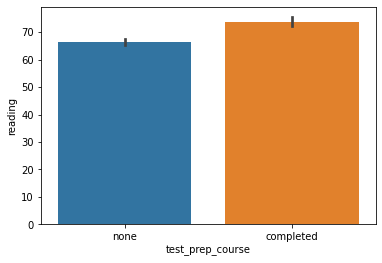

In [16]:
sns.barplot(x='test_prep_course', y='reading',data=df);

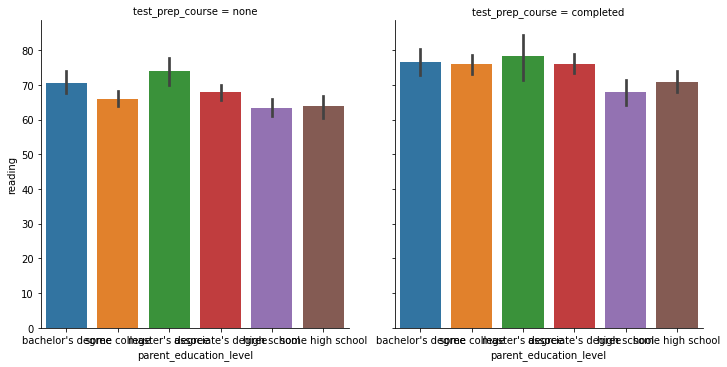

In [17]:
sns.catplot(x='parent_education_level', y='reading', col='test_prep_course', data=df, kind='bar');

4. [Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).

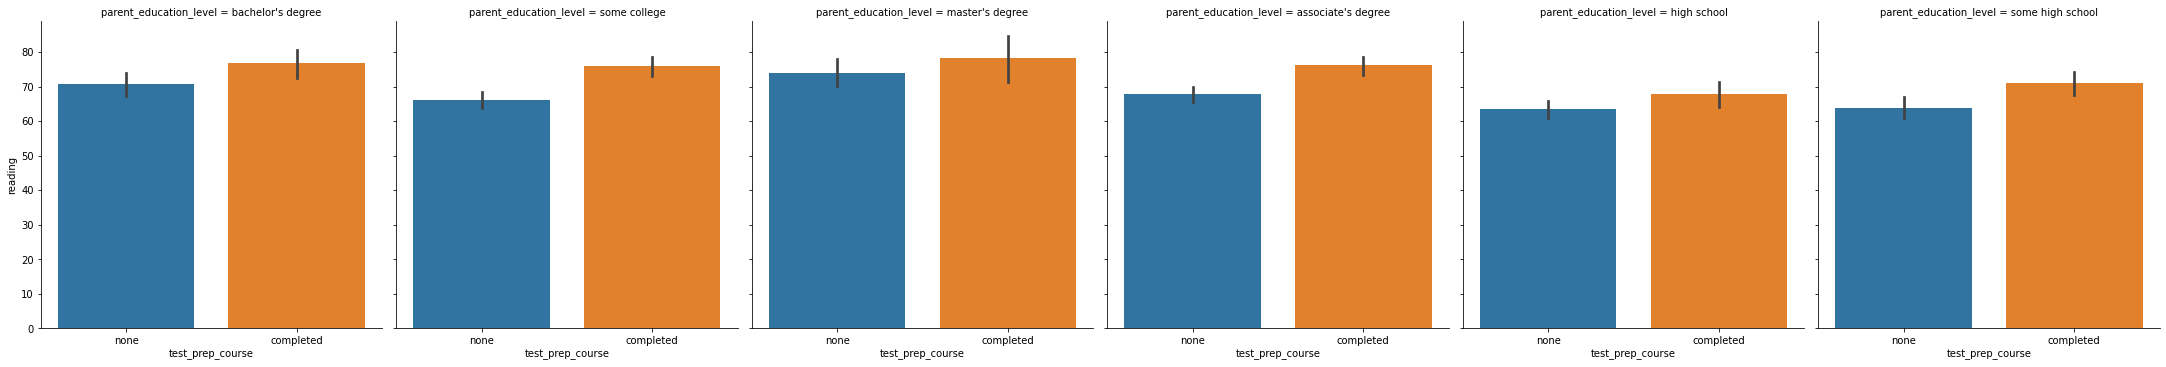

In [18]:
sns.catplot(x='test_prep_course', y='reading', col='parent_education_level', data=df, kind='bar');

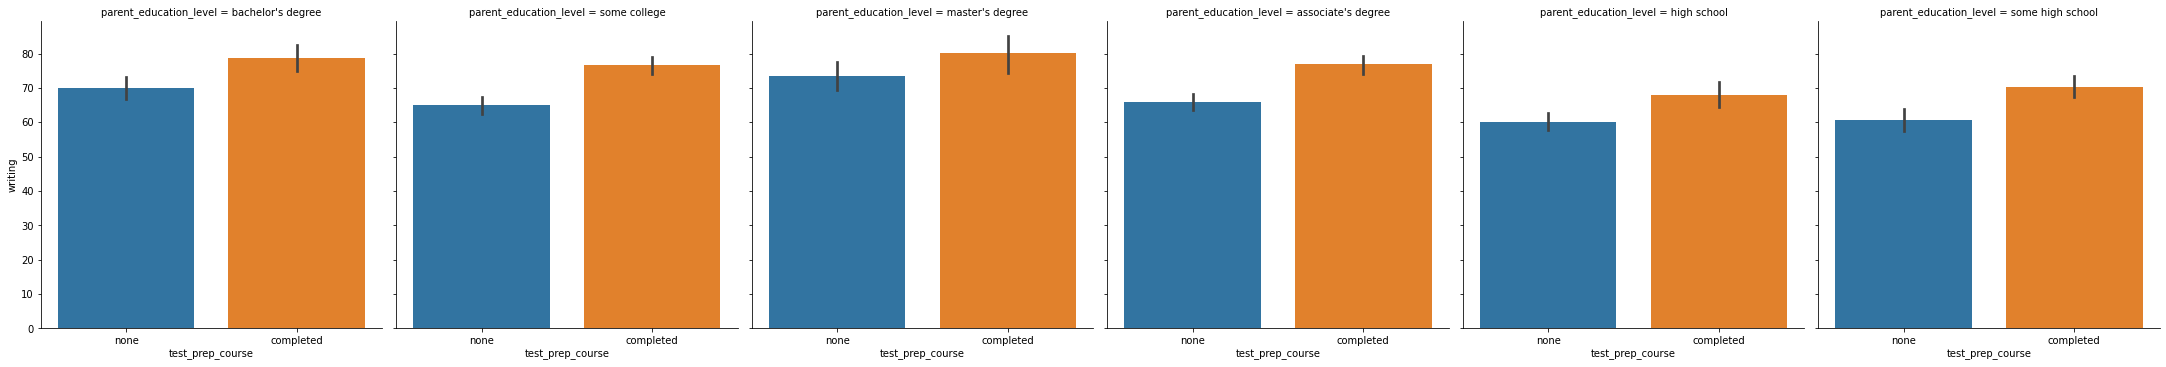

In [19]:
sns.catplot(x='test_prep_course', y='writing', col='parent_education_level', data=df, kind='bar');

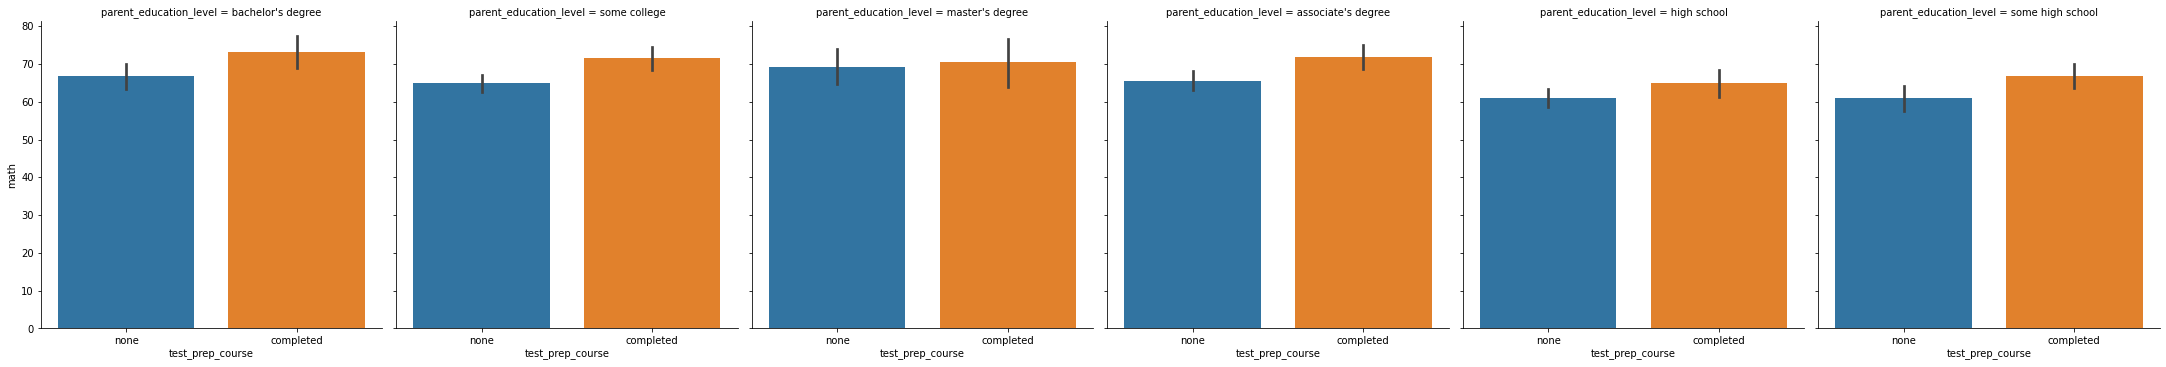

In [20]:
sns.catplot(x='test_prep_course', y='math', col='parent_education_level', data=df, kind='bar');

on average all the students taking the prep course outperform those who didn't, but those with parent's on a master's degree level outperform all the rest.

taking the test preparation course student's with parents on bachellor's degree, some college and associate's degree could perform better than those student's whose parent's owns a master's degree but didn't take the course.

5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores. 

In [21]:
df.groupby('test_prep_course')[['reading', 'writing', 'math']].mean()

,reading,writing,math
test_prep_course,,,
completed,73.893855,74.418994,69.695531
none,66.534268,64.504673,64.077882


In [22]:
df.sort_values(['reading', 'writing', 'math'], ascending=False).head(20)

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
458,female,group E,bachelor's degree,standard,none,100,100,100
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
179,female,group D,some high school,standard,completed,97,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
957,female,group D,master's degree,standard,none,92,100,100
970,female,group D,bachelor's degree,standard,none,89,100,100


On average student's who perform well on one subject also perform well on the other subjects

# Summary

## is there any improvement on average reading scores for students with/without the test preparation course?
i can say that on average the students that took the test improved in reading than those who didn't take the course obtaining an average score of 73.893855 points which is almost 9 points more than the average of score of student's without the course who scored an average of 66.534268 points.

## Is prep course effective?
the data show's that on average every student who takes the course outperform those who didn't take the course so yes, it is effective.

## Did Students who take the course perform better on reading?
yes, on average the student's who takes the course outperform on reading those who didn't take the course.

##  What are the average scores for the different parental education levels?
                                reading       math       writing
    parent_education_level
    master's degree             75.372881    69.745763   75.677966
    bachelor's degree           73.000000    69.389831   73.381356
    associate's degree          70.927928    67.882883   69.896396
    some college                69.460177    67.128319   68.840708
    some high school            66.938547    63.497207   64.888268
    high school                 64.704082    62.137755   62.448980

 
## Does the parent's degree level influence the reading results of the student's?
Although the data showed that students who have parents with higher education levels on average performed better in reading, these results doesn't show any actual causality.

## Does the parent's degree level influence the results of the student's?
Even when the data shows that those students who have parents with higher education levels on average perform better on all the subjects, these result doesn't show an actual causality.

## Could a student outperform a student with parent's with higher education levels?
yes, but not all the time, students with parents that have a bachelor's degree, some college and associate's degree could  have performed better than those students whose parents owns a higher degree.


## did a student who perform well on one subject perform well on the others?
The data shows that students that perform well on one subject perform well on the others


## From this point on it's just me, being me, and exploring the data just for fun, hope you enjoy my work.

does the race has a impact on the average test score

In [23]:
df.groupby('race/ethnicity')[['reading', 'writing', 'math']].mean()

,reading,writing,math
race/ethnicity,,,
group A,64.674157,62.674157,61.629213
group B,67.352632,65.600000,63.452632
group C,69.103448,67.827586,64.463950
group D,70.030534,70.145038,67.362595
group E,73.028571,71.407143,73.821429


it looks like the group E race outperform all the other race's on every skill 🤔

Does the gender has an impact on average test score?

In [24]:
df.groupby('gender')[['reading', 'writing', 'math']].mean()

,reading,writing,math
gender,,,
female,72.608108,72.467181,63.633205
male,65.473029,63.311203,68.728216


It looks like 'females' outperform 'males' on reading and writing but not at math.

does the type of lunch has an impact on test score?

In [25]:
df.groupby('lunch')[['reading', 'writing', 'math']].mean()

,reading,writing,math
lunch,,,
free/reduced,64.653521,63.022535,58.921127
standard,71.654264,70.823256,70.034109


It looks like the student's whit standard lunch outperform the student's who eat the free/reduced lunch. 
Actually, I don't know if free/reduced lunch has the same nutritional values than the standard lunch if this isn't the case probably better eating leads to better learning abilities

In [26]:
df['race/ethnicity'].value_counts(normalize=True)

group C    0.319
group D    0.262
group B    0.190
group E    0.140
group A    0.089
Name: race/ethnicity, dtype: float64

In [27]:
df['gender'].value_counts(normalize=True)

female    0.518
male      0.482
Name: gender, dtype: float64

In [28]:
df['parent_education_level'].value_counts(normalize=True)

some college          0.226
associate's degree    0.222
high school           0.196
some high school      0.179
bachelor's degree     0.118
master's degree       0.059
Name: parent_education_level, dtype: float64

In [29]:
df['lunch'].value_counts(normalize=True)

standard        0.645
free/reduced    0.355
Name: lunch, dtype: float64

In [30]:
df['test_prep_course'].value_counts(normalize=True)

none         0.642
completed    0.358
Name: test_prep_course, dtype: float64

In [31]:
df['test_prep_course'].describe()

count     1000
unique       2
top       none
freq       642
Name: test_prep_course, dtype: object

In [32]:
test_prep_course = df[df['test_prep_course'] == 'completed'];
no_test_prep_course = df[df['test_prep_course'] != 'completed'];

In [33]:
test_prep_course.sort_values(['reading', 'math', 'writing'], ascending=False).head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
916,male,group E,bachelor's degree,standard,completed,100,100,100
149,male,group E,associate's degree,free/reduced,completed,100,100,93
114,female,group E,bachelor's degree,standard,completed,99,100,100
179,female,group D,some high school,standard,completed,97,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100


In [34]:
no_test_prep_course.sort_values(['reading', 'math', 'writing'], ascending=False).head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
712,female,group D,some college,standard,none,98,100,99
957,female,group D,master's degree,standard,none,92,100,100
970,female,group D,bachelor's degree,standard,none,89,100,100


In [36]:
test_prep_course.count()

gender                    358
race/ethnicity            358
parent_education_level    358
lunch                     358
test_prep_course          358
math                      358
reading                   358
writing                   358
dtype: int64

In [37]:
no_test_prep_course.count()

gender                    642
race/ethnicity            642
parent_education_level    642
lunch                     642
test_prep_course          642
math                      642
reading                   642
writing                   642
dtype: int64

In [48]:
test_prep_course['gender'].value_counts(normalize=True)

female    0.513966
male      0.486034
Name: gender, dtype: float64

In [49]:
test_prep_course['lunch'].value_counts(normalize=True)

standard        0.634078
free/reduced    0.365922
Name: lunch, dtype: float64

In [50]:
test_prep_course['parent_education_level'].value_counts(normalize=True)

associate's degree    0.229050
some high school      0.215084
some college          0.215084
high school           0.156425
bachelor's degree     0.128492
master's degree       0.055866
Name: parent_education_level, dtype: float64

In [51]:
no_test_prep_course['parent_education_level'].value_counts(normalize=True)

some college          0.232087
associate's degree    0.218069
high school           0.218069
some high school      0.158879
bachelor's degree     0.112150
master's degree       0.060748
Name: parent_education_level, dtype: float64

In [53]:
no_test_prep_course['lunch'].value_counts(normalize=True)

standard        0.65109
free/reduced    0.34891
Name: lunch, dtype: float64